In [0]:

from google.colab import files
uploaded = files.upload()

Saving covid_19_clean_complete.csv to covid_19_clean_complete.csv


In [0]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np; np.random.seed(24191)
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.simplefilter('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv("covid_19_clean_complete.csv", delimiter=",")
df.groupby(['Country/Region']).sum()
a = df['Country/Region']
print(a)
df.groupby(['Confirmed']).sum()

b = df['Confirmed']
print(b)
# date = [elem for elem in df['Date']]
# values = [elem for elem in df['Confirmed']]
# plt.xticks(range(0,len(date)),rotation=45)
# plt.plot(country, values)
df = pd.read_csv("covid_19_clean_complete.csv")
df.tail(5)
c= df['Date']
print(c)

df['Date'] = pd.to_datetime(df['Date'])
df['months'] = df['Date'].apply(lambda x:x.strftime('%B'))
p = df.groupby('months')
print(p)

0                  Afghanistan
1                      Albania
2                      Algeria
3                      Andorra
4                       Angola
                 ...          
32060    Sao Tome and Principe
32061                    Yemen
32062                  Comoros
32063               Tajikistan
32064                  Lesotho
Name: Country/Region, Length: 32065, dtype: object
0           0
1           0
2           0
3           0
4           0
         ... 
32060     251
32061     197
32062      34
32063    2350
32064       1
Name: Confirmed, Length: 32065, dtype: int64
0        1/22/20
1        1/22/20
2        1/22/20
3        1/22/20
4        1/22/20
          ...   
32060    5/21/20
32061    5/21/20
32062    5/21/20
32063    5/21/20
32064    5/21/20
Name: Date, Length: 32065, dtype: object


In [0]:

def pltCountry_cases(country_name):
    f,ax=plt.subplots(figsize=(16,5))
    labels=country_name
   
    #xcoords = [50]
    #colors = ['g']
    
    #c= df['Date']
    #s=df['Date']
    #s.resample('M').sum()
    #print(c)
    #s = pd.to_datetime(pd.Series(c),format='%m/%d/%Y',"%B")
    #s.index = s.dt.to_period('m')
    #s = s.groupby(level=0).size()

    #s = s.reindex(pd.period_range(s.index.min(), s.index.max(), freq='m'), fill_value=0)
    for a in labels: 
        #print(a)
        country=df.loc[(df['Country/Region']==a)]
       
        #country['Date'].asfreq('M')
        
       
        plt.plot(country['Date'],country['Confirmed'],linewidth=4)
        plt.plot(country['Date'],country['Recovered'],linewidth=4)
        plt.plot(country['Date'],country['Deaths'],linewidth=4)
        #fig = px.bar(df, y='pop', x='country', text='pop')
        #loc = matplotlib.dates.MonthLocator(['1,2,3,4,5'])
        #loc = matplotlib.dates.MonthLocator([6,7,8])
        #fmt =  matplotlib.dates.DateFormatter("%Y-%b")
       # ax.xaxis.set_major_locator(loc)
        #ax.xaxis.set_major_formatter(fmt)
        plt.xticks(rotation=90)
        plt.ylabel('Confirmed,Recovered, Deaths Cases')
        plt.xlabel('Date')
        plt.legend(labels  = ['Confirmed', 'Recovered', 'Deaths'])
        #plt.legend(labels)
       
        ax.set(title='Evolution of the number of Confirmed, Recovered, Deaths cases of GERMANY' )
        #plt.text(2,-50,'This text starts at point (2,4)')
        #df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
        #df.groupby([df['Date'].dt.month_name()])
        
        #plt.setp(ax.get_xticklabels(), rotation=90)
    #for xc,c in zip(xcoords,colors):
     #   plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c)

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5
migration['Arrivals to Austria'].asfreq('M').plot(legend=True)
shifted = migration['Arrivals to Austria'].asfreq('M').shift(1).plot(legend=True)
shifted.legend(['Arrivals to Austria','Arrivals to Austria_lagged'])
plt.show()

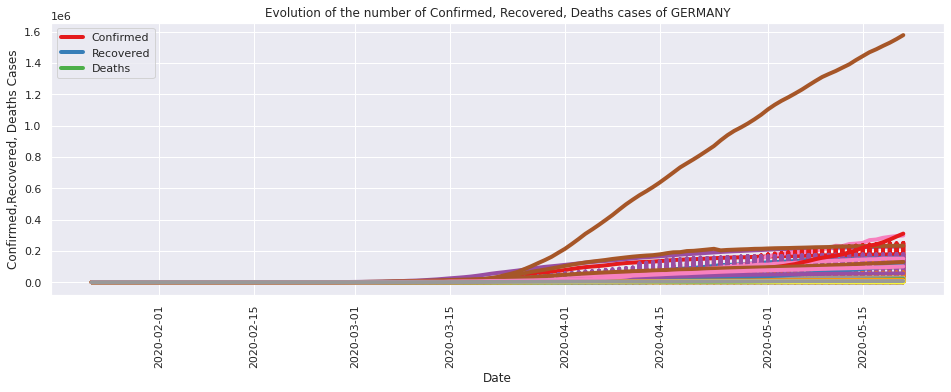

In [0]:
pltCountry_cases(['Germany','Italy','US','United Kingdom','France','Spain','Brazil','Belgium','Iran',''])


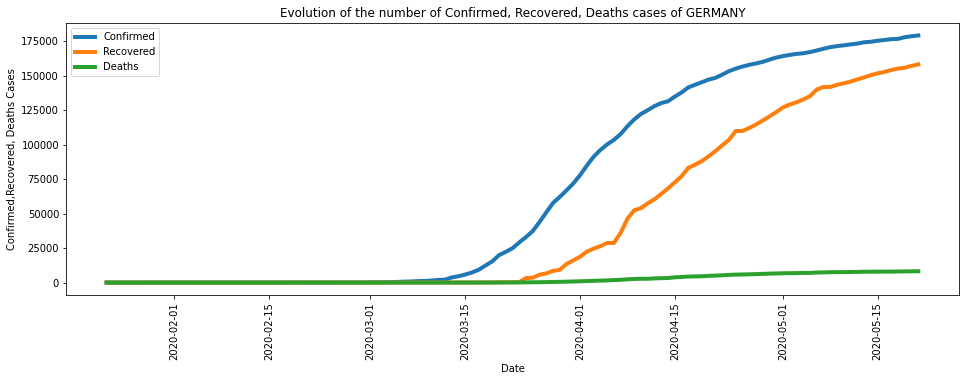

In [0]:
pltCountry_cases(['Germany'])

In [0]:
df_by_date = pd.DataFrame(df.fillna('NA').groupby(['Country/Region','Date'])['Confirmed'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country/Region'] == 'Germany') &(df_by_date.Date >= '2020-01-21')].sort_values('Confirmed',ascending = False), 
             x='Date', y='Confirmed', color="Confirmed", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in Germany')
fig.show()

In [0]:
df_by_date = pd.DataFrame(df.fillna('NA').groupby(['Country/Region','Date'])['Recovered'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country/Region'] == 'Germany') &(df_by_date.Date >= '2020-01-21')].sort_values('Recovered',ascending = False), 
             x='Date', y='Recovered', color="Recovered", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Recovered COVID-19 cases per day in Germany')
fig.show()

In [0]:
df_by_date = pd.DataFrame(df.fillna('NA').groupby(['Country/Region','Date'])['Deaths'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country/Region'] == 'Germany') &(df_by_date.Date >= '2020-01-21')].sort_values('Deaths',ascending = False), 
             x='Date', y='Deaths', color="Deaths", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text=' COVID-19 Deaths cases per day in Germany')
fig.show()

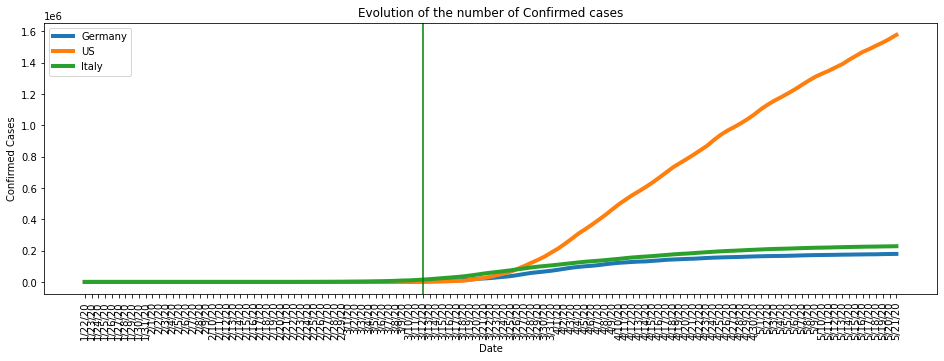

In [0]:
pltCountry_cases(['Germany', 'US','Italy'])

In [0]:
def pltCountry_cases(country_name):
    f,ax=plt.subplots(figsize=(16,5))
    labels=country_name
    for a in labels: 
        #print(a)
        country=df.loc[(df['Country/Region']==a)]
        plt.plot(country['Date'],country['Recovered'],linewidth=4)
        #fig = px.bar(df, y='pop', x='country', text='pop')
        plt.xticks(rotation=90)
        plt.ylabel('Recovered Cases')
        plt.xlabel('Date')
        plt.legend(labels)
        ax.set(title='Evolution of the number of Recovered cases' )

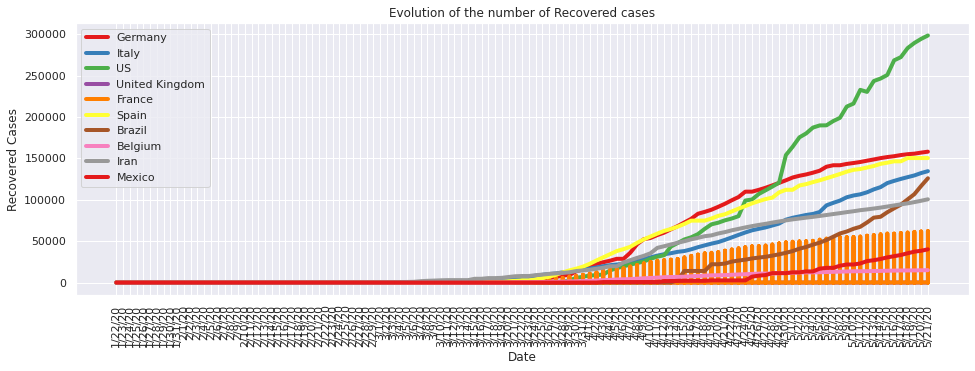

In [0]:
pltCountry_cases(['Germany','Italy','US','United Kingdom','France','Spain','Brazil','Belgium','Iran','Mexico'])


In [0]:
def pltCountry_cases(country_name):
    f,ax=plt.subplots(figsize=(16,5))
    labels=country_name
    for a in labels: 
        #print(a)
        country=df.loc[(df['Country/Region']==a)]
        plt.plot(country['Date'],country['Deaths'],linewidth=4)
        #fig = px.bar(df, y='pop', x='country', text='pop')
        plt.xticks(rotation=90)
        plt.ylabel('Deaths Cases')
        plt.xlabel('Date')
        plt.legend(labels)
        ax.set(title='Evolution of the number of Deaths cases' )

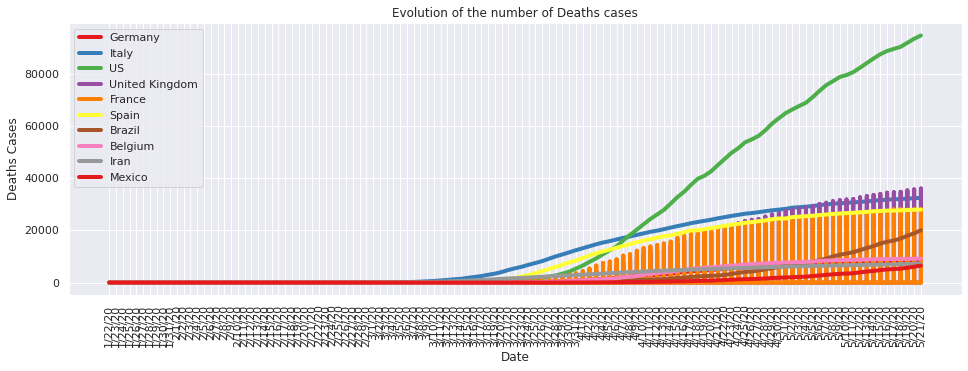

In [0]:
pltCountry_cases(['Germany','Italy','US','United Kingdom','France','Spain','Brazil','Belgium','Iran','Mexico'])


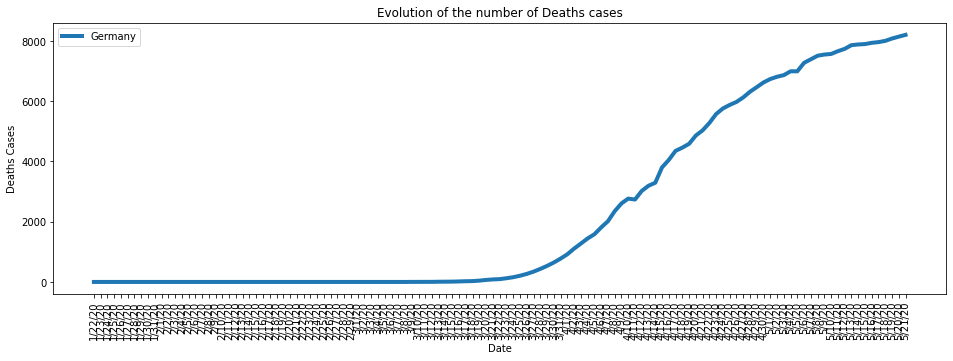

In [0]:
pltCountry_cases(['Germany'])

In [0]:
case='Confirmed'
def timeCompare(time,*argv):
    Coun1=argv[0]
    Coun2=argv[1]
    f,ax=plt.subplots(figsize=(16,5))
    labels=argv  
    country=df.loc[(df['Country/Region']==Coun1)]
    plt.plot(country['Date'],country[case],linewidth=2)
    plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of actual cases',ylabel='Number of cases' )

    country2=df.loc[df['Country/Region']==Coun2]
    #country2['Date']=country2['Date']-datetime.timedelta(days=time)
    plt.plot(country2['Date'],country2[case],linewidth=2)
    #plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of cases in %d days difference '%time ,ylabel='Number of %s cases'%case )

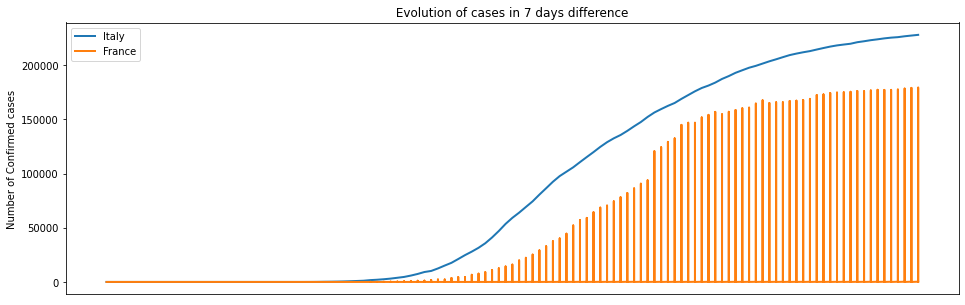

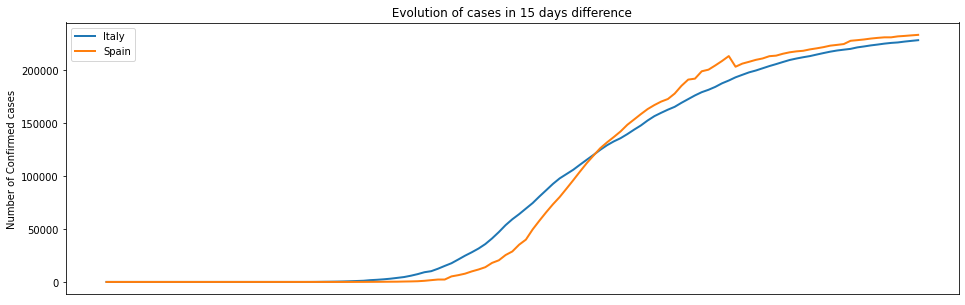

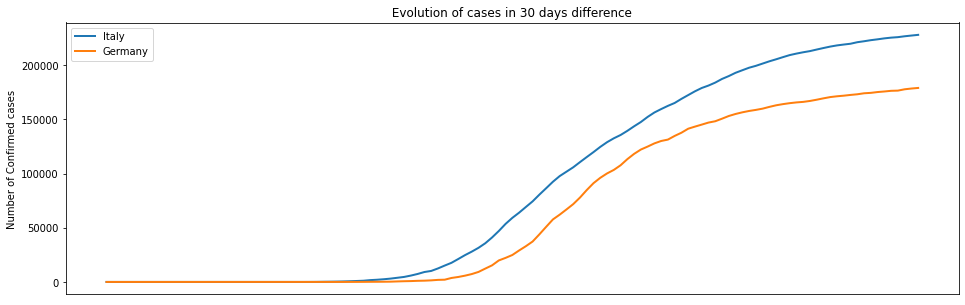

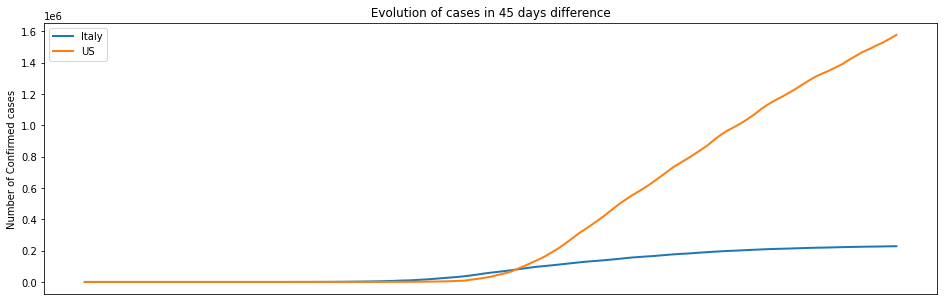

In [0]:
timeCompare(7,'Italy','France')
timeCompare(15,'Italy','Spain')
timeCompare(30,'Italy','Germany')
timeCompare(45,'Italy','US')

In [0]:
sns.set(palette = 'Set1',style='darkgrid')
#Function for making a time serie on a designated country and plotting the rolled mean and standard 
def roll(country,case='Deaths'):
    ts=df.loc[(df['Country/Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['Deaths']>=10)])
    ts=ts[-a:]
    return (ts.rolling(window=4,center=False).mean().dropna())


def rollPlot(country, case='Deaths'):
    ts=df.loc[(df['Country/Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['Deaths']>=10)])
    ts=ts[-a:]
    plt.figure(figsize=(16,6))
    plt.plot(ts.rolling(window=7,center=False).mean().dropna(),label='Rolling Mean')
    plt.plot(ts[case], label='DeathsCases')
    plt.plot(ts.rolling(window=7,center=False).std(),label='Rolling std')
    #plt.plot('Confirmed', label='First Line')
    plt.legend()
    plt.title('Cases distribution in %s with rolling mean and standard' %country)
    plt.xticks([])

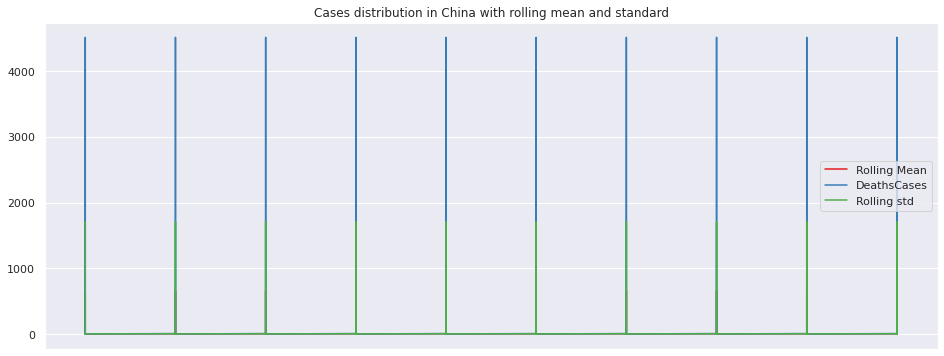

In [0]:
tsC1=roll('China')
rollPlot('China')

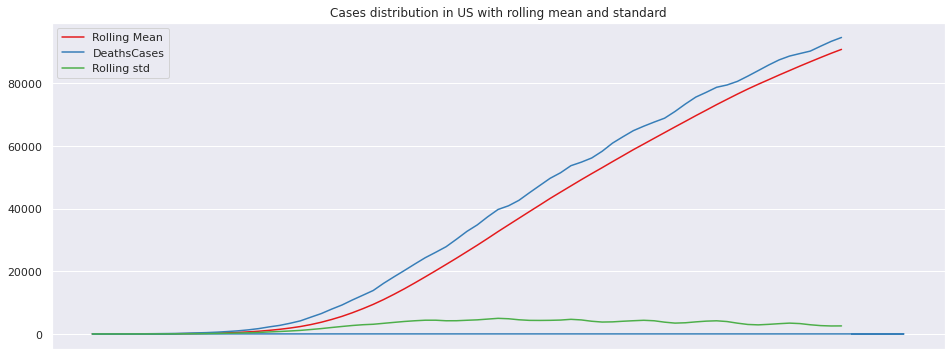

In [0]:
tsC1=roll('US')
rollPlot('US')

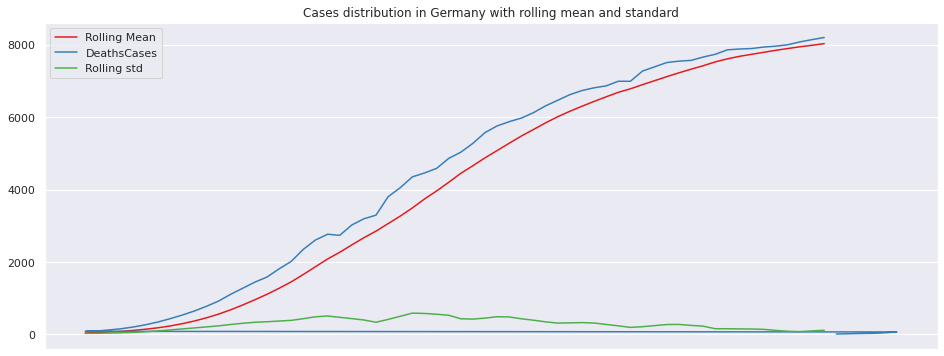

In [0]:
tsC3=roll('Germany')
rollPlot('Germany')

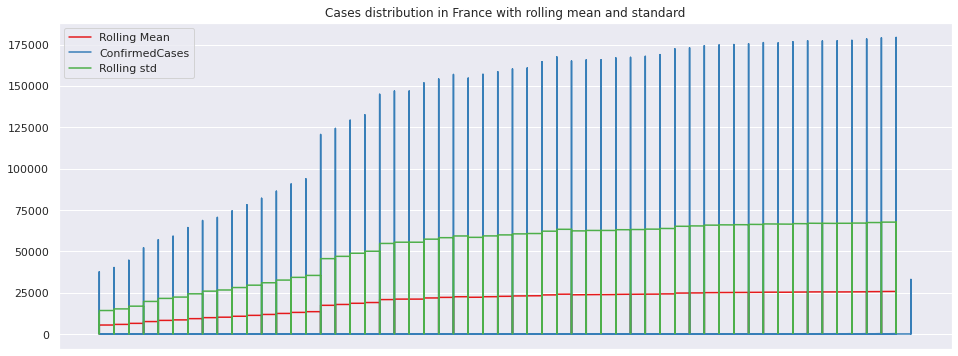

In [0]:
tsC1=roll('France')
rollPlot('France')

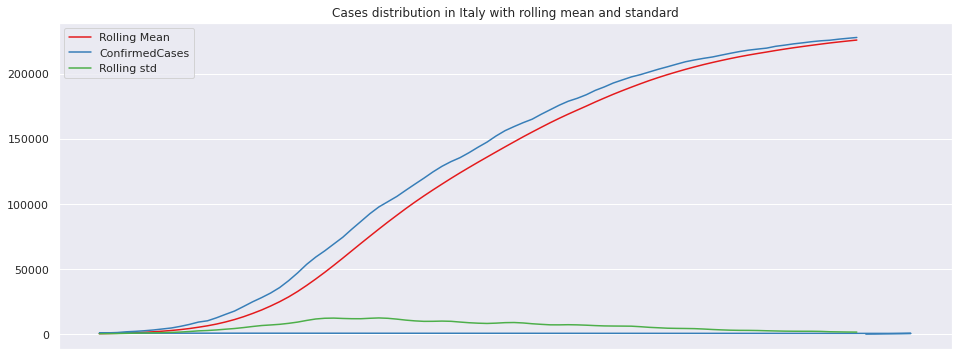

In [0]:
tsC1=roll('Italy')
rollPlot('Italy')

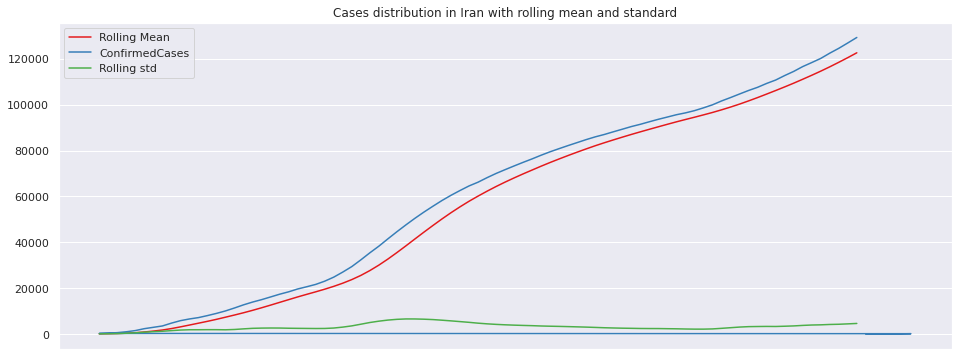

In [0]:
tsC1=roll('Iran')
rollPlot('Iran')

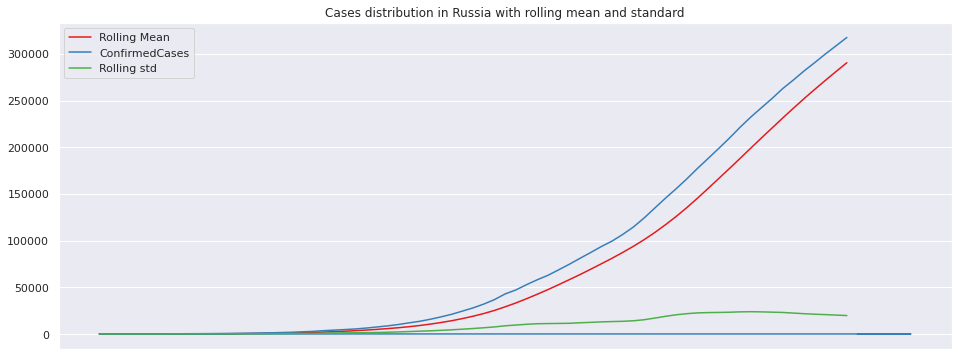

In [0]:
tsC1=roll('Russia')
rollPlot('Russia')

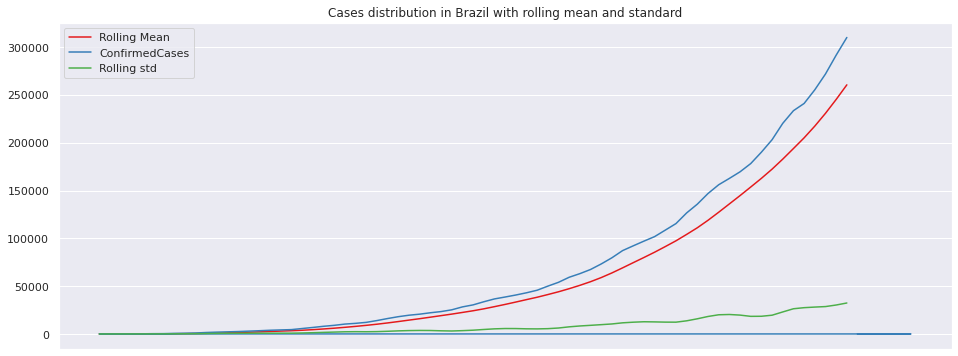

In [0]:
tsC1=roll('Brazil')
rollPlot('Brazil')

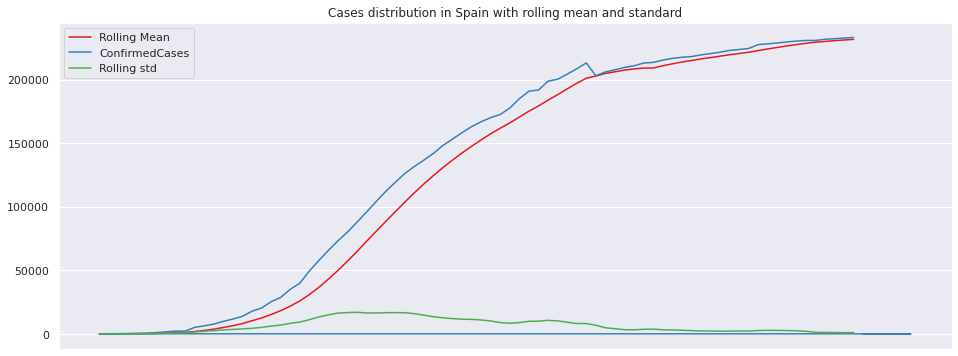

In [0]:
tsC1=roll('Spain')
rollPlot('Spain')

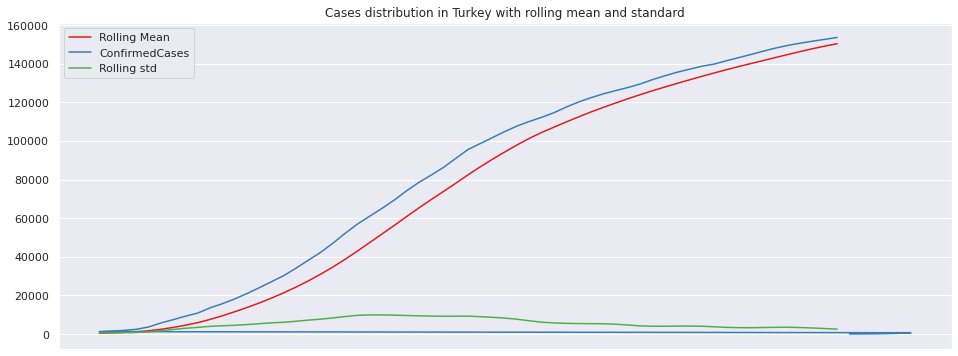

In [0]:
tsC1=roll('Turkey')
rollPlot('Turkey')

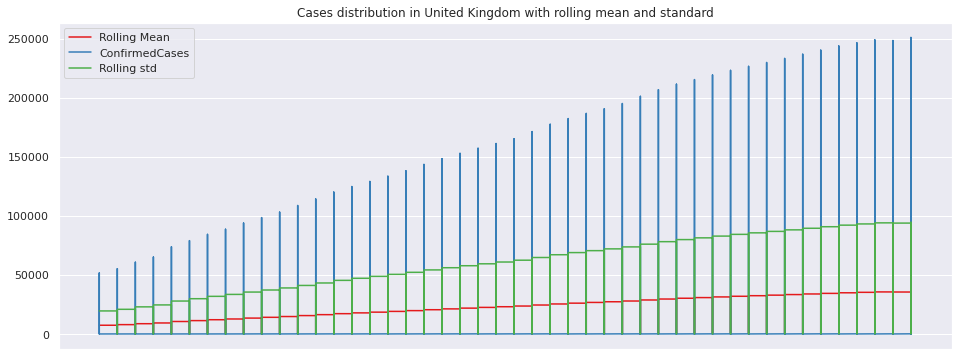

In [0]:
tsC2=roll('United Kingdom')
rollPlot('United Kingdom')

In [0]:
def stationarity(ts):
    print('Results of Dickey-Fuller Test:')
    test = adfuller(ts, autolag='AIC')
    results = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for i,val in test[4].items():
        results['Critical Value (%s)'%i] = val
    print (results)

#For UK
tsC=tsC2['Confirmed'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                  -5.607278
p-value                          0.000001
#Lags Used                      18.000000
Number of Observations Used    480.000000
Critical Value (1%)             -3.444047
Critical Value (5%)             -2.867580
Critical Value (10%)            -2.569987
dtype: float64


In [0]:
def stationarity(ts):
    print('Results of Dickey-Fuller Test:')
    test = adfuller(ts, autolag='AIC')
    results = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for i,val in test[4].items():
        results['Critical Value (%s)'%i] = val
    print (results)

#For Germany
tsC=tsC3['Confirmed'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -0.842149
p-value                         0.806427
#Lags Used                     13.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64


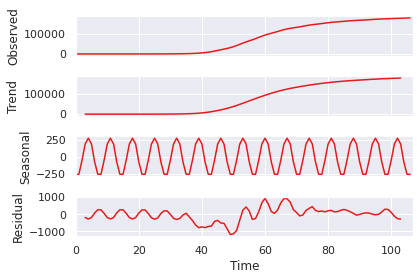

In [0]:
fig=sm.tsa.seasonal_decompose(tsC3.values,freq=7).plot()